In [89]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [90]:
# reading the merged dataset with the number of side effects column
df = pd.read_csv("merged_drug_data_with_num_side_effects.csv")

In [91]:
# getting rid of the rows where rating = na
df = df.dropna(subset=['rating', 'num_side_effects'])

In [92]:
X = df['rating']  # independent variable
y = df['num_side_effects']  # dependent variable

X = sm.add_constant(X)  # adds the intercept term
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       num_side_effects   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.1288
Date:                Mon, 16 Jun 2025   Prob (F-statistic):              0.720
Time:                        15:44:47   Log-Likelihood:                -415.98
No. Observations:                 105   AIC:                             836.0
Df Residuals:                     103   BIC:                             841.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.1997      9.527      2.435      0.0

Take away from this summary: 
There is no statistically significant relationship between a drug’s ranking and its number of side effects. The regression slope is nearly zero (–0.36), and the p-value (0.72) confirms that this trend is not significant. Additionally, the R² value (0.001) shows that the ranking explains virtually none of the variation in side effects. What if we subset the rankings to be within 8 and 10 stars? 


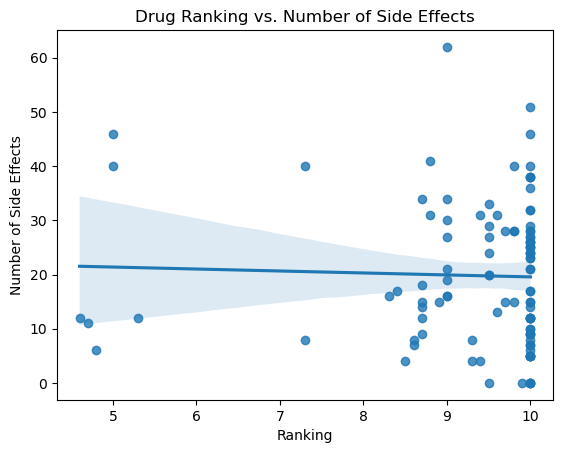

In [93]:
sns.regplot(x='rating', y='num_side_effects', data=df)
plt.title('Drug Ranking vs. Number of Side Effects')
plt.xlabel('Ranking')
plt.ylabel('Number of Side Effects')
plt.show()

As we can see, it's hard to tell what's going on in this graph, so we're going to focus on the ranks between 5 and 10 in order to reduce the effect of extreme values.

In [ ]:
df_high_rank = df[(df['rating'] >= 5) & (df['rating'] < 10)]

In [95]:
X = df_high_rank['rating']  # independent variable
y = df_high_rank['num_side_effects']  # dependent variable

X = sm.add_constant(X)  # adds the intercept term
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       num_side_effects   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.546
Date:                Mon, 16 Jun 2025   Prob (F-statistic):              0.220
Time:                        15:44:48   Log-Likelihood:                -186.77
No. Observations:                  47   AIC:                             377.5
Df Residuals:                      45   BIC:                             381.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.2189     15.185      2.649      0.0

Coefficient for Rating: -2.1232

For each 1-unit increase in rating, the predicted number of side effects decreases by about 2.12.

So, higher-rated drugs tend to have fewer side effects but…

P-value for Rating: 0.220

This is greater than 0.05, meaning the result is not statistically significant.

-> You cannot confidently say there's a real relationship between rating and side effects based on this data.

R-squared: 0.033

Only 3.3% of the variation in number of side effects is explained by the drug rating.

-> The model fits the data very poorly.
Although the regression suggests a negative relationship between drug rating and number of side effects (higher rating → fewer side effects), the relationship is weak and not statistically significant. 

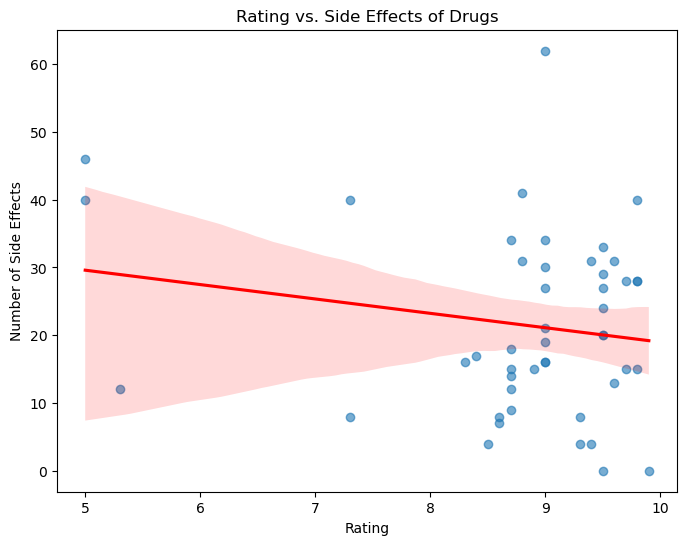

In [96]:
# graph for better visualiation 

plt.figure(figsize=(8, 6))
sns.regplot(
    x='rating',
    y='num_side_effects',
    data=df_high_rank,
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}  # Change this to any color you like
)
plt.title('Rating vs. Side Effects of Drugs')
plt.xlabel('Rating')
plt.ylabel('Number of Side Effects')
plt.show()
